In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from scipy.optimize import curve_fit
from matplotlib.ticker import ScalarFormatter, NullFormatter, FixedLocator, FixedFormatter

In [2]:
%matplotlib inline
%matplotlib notebook

In [3]:
plt.rcParams.update({'font.size': 14})

plt.rcParams.update({'axes.linewidth': 2.25})
plt.rcParams.update({'axes.labelpad': 5})

plt.rcParams.update({'xtick.major.size': 7.5})
plt.rcParams.update({'xtick.minor.size': 4.5})
plt.rcParams.update({'ytick.major.size': 7.5})
plt.rcParams.update({'ytick.minor.size': 4.5})

plt.rcParams.update({'xtick.major.width': 1.5})
plt.rcParams.update({'ytick.major.width': 1.5})
plt.rcParams.update({'xtick.minor.width': 1.5})
plt.rcParams.update({'ytick.minor.width': 1.5})

plt.rcParams.update({'xtick.major.pad': 5})
plt.rcParams.update({'ytick.major.pad': 5})

plt.rcParams.update({'xtick.top': True})
plt.rcParams.update({'ytick.right': True})
plt.rcParams.update({'xtick.labeltop': False})
plt.rcParams.update({'ytick.labelright': False})

plt.rcParams.update({'xtick.direction': "in"})
plt.rcParams.update({'ytick.direction': "in"})

In [4]:
def fline(x,a,b):
    """ Line given slope and intercept. """
    return a*x + b

In [5]:
def convert_wl(freq):
    return 29979245800.0/((freq+1e-30)*1e9)

def convert_freq(wl):
    return 29979245800.0/(wl+1e-30)*1e-9

In [6]:
import matplotlib.colors as colors
import matplotlib.cm as cmx

interval  = np.linspace(-1.,3.,6)
cm        = plt.get_cmap('plasma') 
cNorm     = colors.Normalize(vmin=interval[0], vmax=interval[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)

color1    = scalarMap.to_rgba(interval[1])
color2    = scalarMap.to_rgba(interval[3])
color3    = scalarMap.to_rgba(interval[4])

<IPython.core.display.Javascript object>


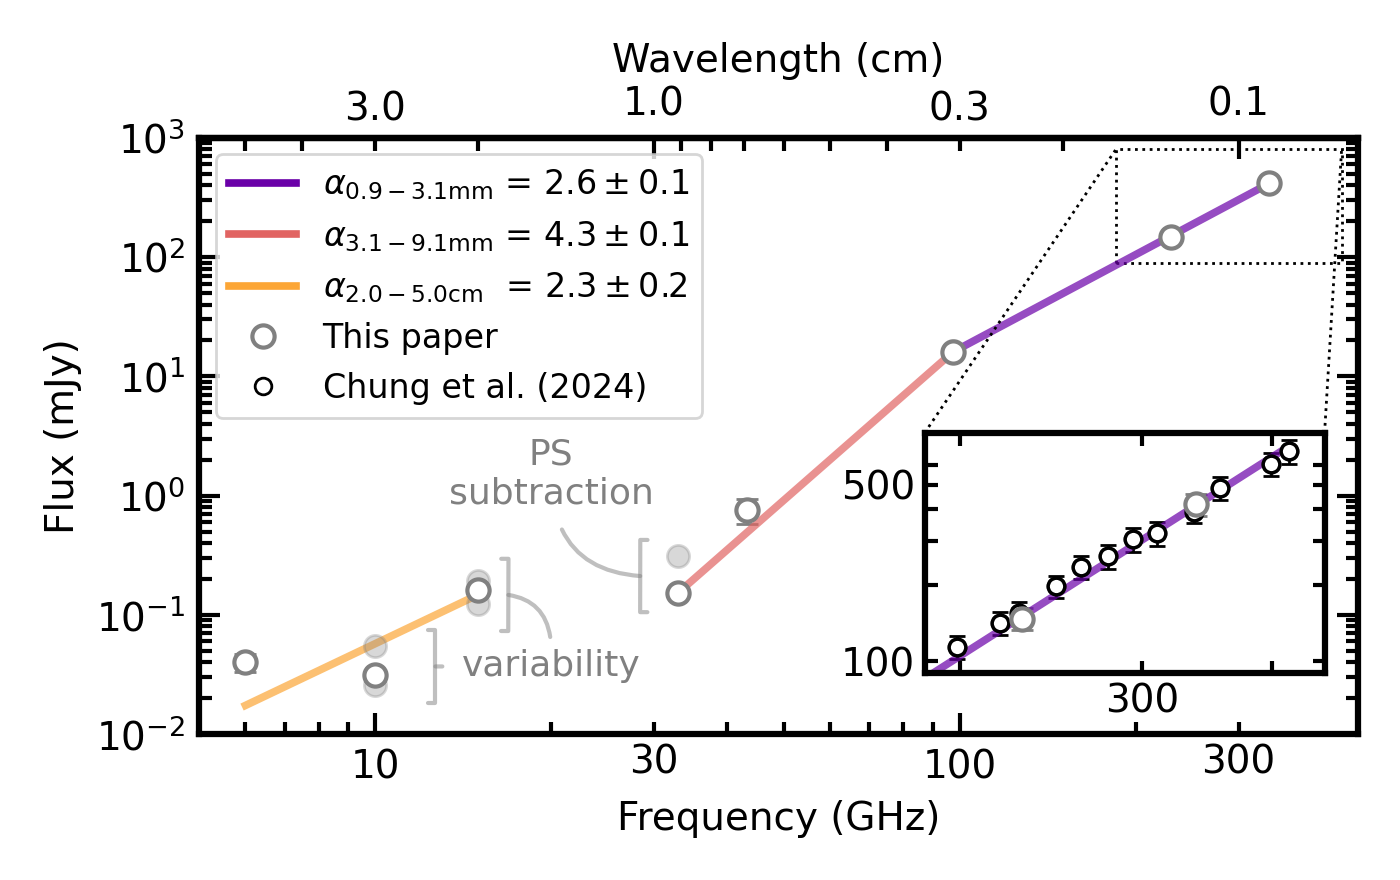

Percent of continuum contribution at C, X, and Ku Band freqs = [0.03191992 0.0292638  0.00254648]


In [7]:
fig, axs = plt.subplots(figsize=(7.0,4.4))

freq    = np.array([338.228  ,229.612  ,97.504  ,43.34  ,33.    ,15.      ,10.      ,6.     ])
flux    = np.array([418.98e-3,147.68e-3,16.33e-3,0.76e-3,0.31e-3,0.1631e-3,0.0312e-3,0.04e-3])*1e3 #0.1613,0.0324 mcmc visfit, #5.5598475606604e-05 flaring
uncr    = np.array([4.12e-5  ,9.61e-6  ,5.50e-6 ,0.17e-3,1.56e-6,2.83e-6  ,2.64e-6  ,6.60e-6])*1e3
cal_err = np.array([0.10     ,0.10     ,0.05    ,0.10   ,0.10   ,0.05     ,0.05     ,0.05   ])
uncr    = np.hypot(uncr,cal_err*flux)
"""
popt, pcov = curve_fit(
    f=fline, xdata=np.log10(freq[2:5]), ydata=np.log10(flux[2:5]), 
    sigma=uncr[2:5]/flux[2:5]/np.log(10), absolute_sigma=True
)
perr = np.sqrt(np.diag(pcov)) 
plt.loglog(
    freq[2:5],10.**fline(np.log10(freq[2:5]),*popt),lw=2,
    label=r'$\alpha_{\rm wFF}$ = ' + f'${{{popt[0]:3.2f}}} \pm {{{perr[0]:3.2f}}}$',color='k',ls='--'
)
"""
plt.errorbar(freq,flux,ls='none',lw=1,capsize=4,capthick=1,marker='o',ms=8,color='gray',alpha=0.3)

plt.errorbar([15, 15],[0.1915, 0.1225],ls='none',lw=1,capsize=4,capthick=1,marker='o',ms=8,color='gray',alpha=0.3)
plt.errorbar([10, 10],[0.0549, 0.0257],ls='none',lw=1,capsize=4,capthick=1,marker='o',ms=8,color='gray',alpha=0.3)

freq    = np.array([338.228  ,229.612  ,97.504    ,43.34  ,33.      ,15.      ,10.      ,6.     ])
flux    = np.array([418.98e-3,147.68e-3,16.0974e-3,0.76e-3,0.1537e-3,0.1631e-3,0.0312e-3,0.04e-3])*1e3
uncr    = np.array([4.12e-5  ,9.61e-6  ,5.50e-6   ,0.17e-3,1.56e-6  ,2.83e-6  ,2.64e-6  ,6.60e-6])*1e3
cal_err = np.array([0.10     ,0.10     ,0.05      ,0.10   ,0.10     ,0.05     ,0.05     ,0.05   ])
uncr    = np.hypot(uncr,cal_err*flux)

plt.errorbar(freq,flux,yerr=uncr,ls='none',lw=1,capsize=4,capthick=1,marker='o',ms=8,mew=1,color='gray',mfc='w',mec='gray')
plt.errorbar(freq,flux,ls='none',lw=1,marker='o',ms=8,mew=1.5,color='gray',mfc='w',mec='gray')

popt, pcov = curve_fit(
    f=fline, xdata=np.log10(freq[:3]), ydata=np.log10(flux[:3]), 
    sigma=uncr[:3]/flux[:3]/np.log(10), absolute_sigma=True
)
perr = np.sqrt(np.diag(pcov))
labelALMA = r'$\alpha_{\rm 0.9-3.1mm}$ = ' + f'${{{popt[0]:3.1f}}} \pm {{{perr[0]:3.1f}}}$'

plt.loglog(
    freq[:3],10.**fline(np.log10(freq[:3]),*popt),lw=2.75,alpha=0.7,label=labelALMA,color=color1
)

popt, pcov = curve_fit(
    f=fline, xdata=[np.log10(freq[2]),np.log10(freq[4])], ydata=[np.log10(flux[2]),np.log10(flux[4])], 
    sigma=[uncr[2]/flux[2]/np.log(10),uncr[4]/flux[4]/np.log(10)], absolute_sigma=True
)
perr = np.sqrt(np.diag(pcov))
labelVLA = r'$\alpha_{\rm 3.1-9.1mm}$ = ' + f'${{{popt[0]:3.1f}}} \pm {{{perr[0]:3.1f}}}$'

plt.loglog(
    [freq[2],freq[4]],
    10**fline(np.array([np.log10(freq[2]),np.log10(freq[4])]),*popt),lw=2.75,alpha=0.7,
    label=labelVLA,color=color2
)

#flux45 = np.interp(np.log10(45),np.log10(np.linspace(33.0,97.5,100)),10**fline(np.log10(np.linspace(33.0,97.5,100)),*popt))
#print(flux45)
#plt.scatter(45,flux45,marker='o',c='k',s=100)

print('Percent of continuum contribution at C, X, and Ku Band freqs = {}'.format(10**fline(np.log10(freq[-3:]),*popt)/flux[-3:]))
      
popt, pcov = curve_fit(
    f=fline, xdata=np.log10(freq[-3:]), ydata=np.log10(flux[-3:]), 
    sigma=uncr[-3:]/flux[-3:]/np.log(10), absolute_sigma=True
)
perr = np.sqrt(np.diag(pcov))
labelFF = r'$\alpha_{\rm 2.0-5.0cm}$  = ' + f'${{{popt[0]:3.1f}}} \pm {{{perr[0]:3.1f}}}$'

plt.loglog(
    freq[-3:],10**fline(np.log10(freq[-3:]),*popt),lw=2.75,alpha=0.7,label=labelFF,color=color3
)

bracketstyle = f"-[, angleB=4"
axs.annotate(
    'PS\nsubtraction', xy=(30,0.21), xytext=(20,1.51), color='gray', fontsize=13,
    arrowprops=dict(arrowstyle=bracketstyle, connectionstyle='arc3,rad=0.5', lw=1.5, color='gray', alpha=0.5, 
                    shrinkA=5, shrinkB=5,),horizontalalignment="center", verticalalignment="center",
)

bracketstyle = f"-[, angleB=0"
axs.annotate(
    'variability', xy=(12,0.037), xytext=(20,0.037), color='gray', fontsize=13,
    arrowprops=dict(arrowstyle=bracketstyle, connectionstyle='arc3,rad=0.0', lw=1.5, color='gray', alpha=0.5, 
                    shrinkA=5, shrinkB=5,),horizontalalignment="center", verticalalignment="center",
)

bracketstyle = f"-[, angleB=8.5"
axs.annotate(
    '', xy=(16,0.15), xytext=(20,0.05), color='gray', fontsize=13,
    arrowprops=dict(arrowstyle=bracketstyle, connectionstyle='arc3,rad=0.5', lw=1.5, color='gray', alpha=0.5, 
                    shrinkA=5, shrinkB=5,),horizontalalignment="center", verticalalignment="center",
)

axs.set_xlabel(r'Frequency (GHz)')
axs.set_ylabel(r'Flux (mJy)')

axs.xaxis.set_minor_locator(FixedLocator([6,7,8,9,10,20,30,40,50,60,70,80,90,100,200,300]))
axs.xaxis.set_minor_formatter(FixedFormatter(['','','','','','30','','','','','','','','300']))

axs.set_xticks([10,100],['10','100'])
axs.get_xaxis().set_major_formatter(ScalarFormatter())

axs.tick_params(axis='x',which='both',top=False,labeltop=False)

secax = axs.secondary_xaxis('top', functions=(convert_wl,convert_freq))

secax.xaxis.set_minor_locator(FixedLocator([5,4,3,2,1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]))
secax.xaxis.set_minor_formatter(FixedFormatter(['','','3.0','','','','','','','','0.3','','']))
secax.set_xticks([0.1,1],['0.1','1'])
secax.get_xaxis().set_major_formatter(ScalarFormatter())

secax.set_xlabel(r'Wavelength (cm)')

# axs.set_xlim(5,10**2.6)
axs.set_xlim(5,480)
axs.set_ylim(1e-2,1e3)

fig.tight_layout()
"""
flux_FF = [0.2326,0.1563,0.16]
freq_FF = [97.504,33.   ,15. ]

plt.errorbar(freq_FF,flux_FF,ls='none',lw=1,capsize=4,capthick=1,marker='o',ms=8,color='gray',alpha=0.3)
popt, pcov = curve_fit(
    f=fline, xdata=np.log10(freq_FF), ydata=np.log10(flux_FF), 
    sigma=np.array([0.05,0.1,0.1])/np.log(10), absolute_sigma=True
)
perr = np.sqrt(np.diag(pcov))

plt.loglog(
    freq_FF, 10**fline(np.log10(freq_FF),*popt),lw=2,
    label=r'$\alpha_{\rm ff}$ = ' + f'${{{popt[0]:3.2f}}} \pm {{{perr[0]:3.2f}}}$',color=color_list[3]
)

axs.legend()
"""

from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

axin = inset_axes(
    axs, 
    width  = 2.0,
    height = 1.2,
    loc    = 'upper right',
    bbox_to_anchor=[0.79,0.42,0.17,0.11], 
    bbox_transform=axs.figure.transFigure
)

mark_inset(axs, axin, loc1=2, loc2=1, ls=':', ec='k')

flux_sean = np.array([114.0, 142.1, 156.0, 198.0, 237.2, 260.5, 303.9, 320.9, 390.8, 485.1, 605.3, 679.4])
uncr_sean = np.array([11.8, 14.7, 16.0, 20.2, 25.1, 28.7, 32.2, 34.1, 39.4, 49.4, 62.6, 73.4])
freq_sean = np.array([199, 219, 228, 248, 262, 278, 294, 310, 337, 357, 399.5, 415.5])

axin.errorbar(freq_sean,flux_sean,yerr=uncr_sean,ls='none',lw=1,capsize=3,capthick=1,marker='o',ms=6,mew=1,color='k',mfc='w',mec='k')
axin.errorbar(freq_sean,flux_sean,ls='none',lw=1,marker='o',ms=6,mew=1.25,color='k',mfc='w',mec='k',label='Chung et al. (2024)')

axin.errorbar(freq,flux,yerr=uncr,ls='none',lw=1,capsize=4,capthick=1,marker='o',ms=8,mew=1,color='gray',mfc='w',mec='gray')
axin.errorbar(freq,flux,ls='none',lw=1,marker='o',ms=8,mew=1.5,color='gray',mfc='w',mec='gray',label='This paper')

popt, pcov = curve_fit(
    f=fline, xdata=np.log10(freq[:3]), ydata=np.log10(flux[:3]), 
    sigma=uncr[:3]/flux[:3]/np.log(10), absolute_sigma=True
)
perr = np.sqrt(np.diag(pcov))

axin.loglog(
    np.hstack((freq[2],freq_sean)),10.**fline(np.log10(np.hstack((freq[2],freq_sean))),*popt),color=color1,lw=2.75,alpha=0.7,
    # label=r'$\alpha_{\rm ALMA}$ = ' + f'${{{popt[0]:3.2f}}} \pm {{{perr[0]:3.2f}}}$'
)

axin.set_xlim(185,450)
axin.set_ylim(90,800)

axin.set_xticks([],[])
axin.get_xaxis().set_major_formatter(ScalarFormatter())

# axin.tick_params(top=True, labeltop=True, bottom=True, labelbottom=False)

axin.xaxis.set_minor_locator(FixedLocator([200,300,400]))
axin.xaxis.set_minor_formatter(FixedFormatter(['','300','']))

axin.set_yticks([],[])
axin.get_yaxis().set_major_formatter(ScalarFormatter())

axin.yaxis.set_minor_locator(FixedLocator([100,200,300,400,500,600]))
axin.yaxis.set_minor_formatter(FixedFormatter(['100','','','','500','']))

from matplotlib.lines import Line2D   

legend_elements = [
    Line2D([0], [0], ls='-', color=color1, lw=2.75, label=labelALMA),
    Line2D([0], [0], ls='-', color=color2, lw=2.75, label=labelVLA),
    Line2D([0], [0], ls='-', color=color3, lw=2.75, label=labelFF),
    Line2D([0], [0], ls='none', marker='o', color='gray', ms=8, mfc='w', mec='gray', mew=1.50, label='This paper'),
    Line2D([0], [0], ls='none', marker='o', color='k', ms=6, mfc='w', mec='k', lw=1.25, label='Chung et al. (2024)'),
]

axs.legend(handles=legend_elements, loc='upper left',fontsize=12)

# plt.savefig('spectral_distribution.pdf',bbox_inches='tight')
plt.savefig('spectral_distribution_sean.pdf',bbox_inches='tight')

plt.show()

In [8]:
color_list = ['#6b8ce6','#da70d6','#ff0000','#ffb255','#ffd800']

<IPython.core.display.Javascript object>


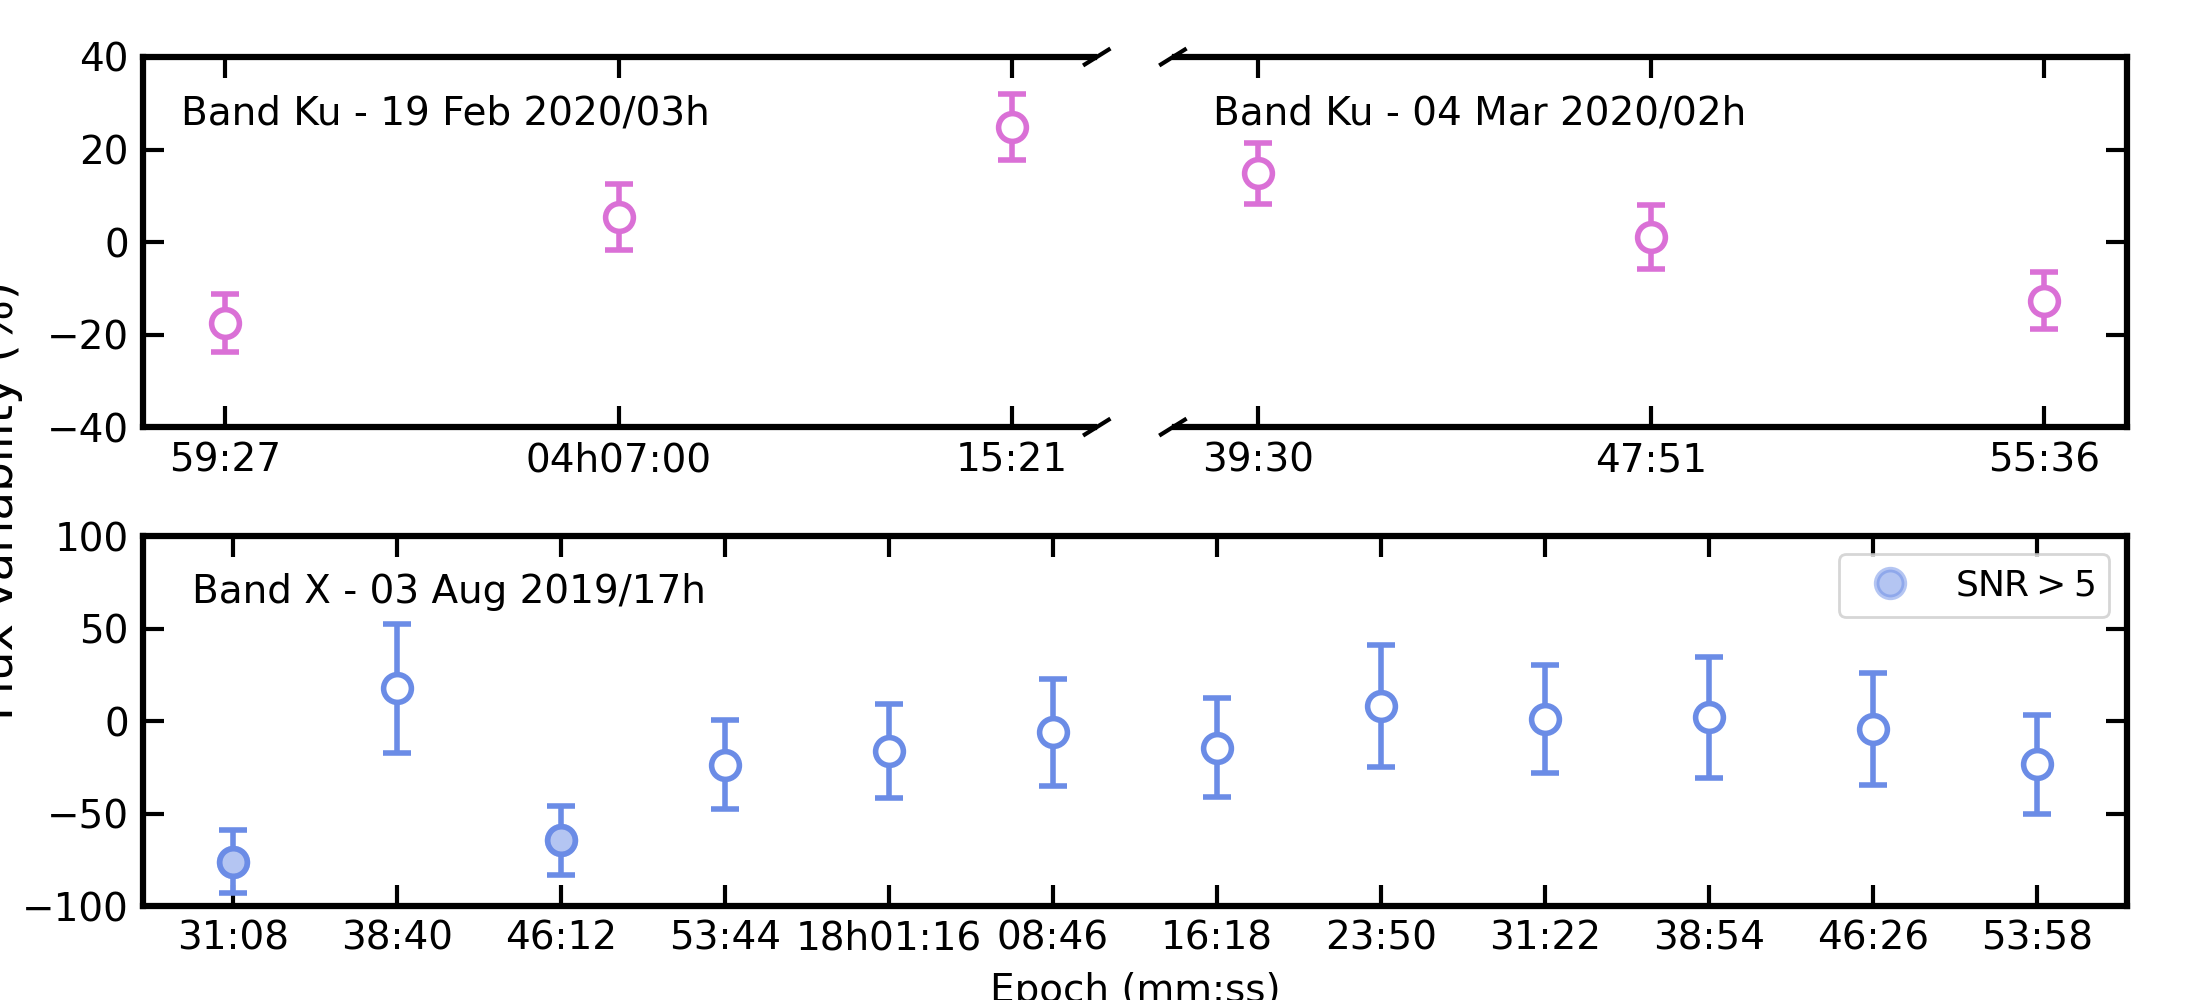

In [9]:
fig, axs = plt.subplots(2,1,figsize=(11,5))

fig.tight_layout()

centre   = gridspec.GridSpecFromSubplotSpec(1,2,subplot_spec=axs[0],wspace=0.085,hspace=0.1,width_ratios=[0.5,0.5])
axs_plot_feb = plt.subplot(centre[0])
axs_plot_mar = plt.subplot(centre[1])#, sharey=axs_plot_feb
d = .02

fluxKu_tclean = np.array([0.1915,  0.1542,  0.1225,  0.1388,  0.1613,  0.1838  ])
uncrKu_tclean = np.array([6.46e-03,7.29e-03,5.95e-03,5.40e-03,7.22e-03,5.66e-03])
epochKu  = np.array(['59:27','04h07:00','15:21','39:30','47:51','55:36'])
uncrKu   = np.hypot(0.05*fluxKu_tclean,uncrKu_tclean) #because observations were taken in different EBs

varKu    = (1 - fluxKu_tclean/flux[5])*100
uvarKu   = np.hypot(uncrKu/fluxKu_tclean,2.83e-3/flux[5])*100

fluxX_tclean = np.array([0.0549,  0.0257,  0.0513,  0.0386,  0.0363,  0.0331,  0.0357,  0.0287,  0.0308,  0.0306,  0.0325,  0.0385  ])
uncrX_tclean = np.array([8.12e-03,8.69e-03,8.46e-03,8.70e-03,8.69e-03,9.16e-03,9.02e-03,9.10e-03,8.61e-03,9.65e-03,9.41e-03,9.76e-03])
epochX   = np.array(['31:08','38:40','46:12','53:44','18h01:16','08:46','16:18','23:50','31:22','38:54','46:26','53:58'])
uncrX    = np.hypot(0.00*fluxX_tclean,uncrX_tclean)
SNRX     = np.array([6.76,2.96,6.07,4.43,4.18,3.62,3.96,3.16,3.58,3.17,3.46,3.94])

varX     = (1 - fluxX_tclean/flux[6])*100
uvarX    = np.hypot(uncrX/fluxX_tclean,2.64e-3/flux[6])*100
  
axs_plot_feb.errorbar(
    np.arange(len(varKu[:3])),varKu[:3],yerr=uvarKu[:3],ls='none',marker='o',lw=2,
    capsize=5,capthick=1,ms=10,mfc='w',mew=2,c=color_list[1],zorder=10
)
axs_plot_mar.errorbar(
    np.arange(len(varKu[3:])),varKu[3:],yerr=uvarKu[3:],ls='none',marker='o',lw=2,
    capsize=5,capthick=1,ms=10,mfc='w',mew=2,c=color_list[1],zorder=10
)
axs[1].errorbar(
    np.arange(len(varX)),varX,yerr=uvarX,ls='none',marker='o',lw=2,
    capsize=5,capthick=1,ms=10,mfc='w',mew=2,c=color_list[0],zorder=10
)
axs[1].errorbar(
    np.arange(len(varX))[SNRX>5],varX[SNRX>5],ls='none',marker='o',lw=2,
    capsize=5,capthick=1,ms=10,mfc=color_list[0],mew=2,c=color_list[0],zorder=10,alpha=0.5,label=r'${\rm SNR}>5$'
)
axs[1].legend(loc='upper right',fontsize=13)

axs_plot_feb.set_ylim(-40,40)
axs_plot_mar.set_ylim(-40,40)
axs_plot_feb.set_xlim(-0.21,2.21)
axs_plot_mar.set_xlim(-0.21,2.21)
axs[1].set_ylim(-100,100)
axs[1].set_xlim(-0.55,11.55)

axs[1].set_xlabel('Epoch (mm:ss)')

axs_plot_feb.set_xticks([0,1,2],epochKu[:3])
axs_plot_mar.set_xticks([0,1,2],epochKu[3:])
axs[1].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11],epochX)

axs_plot_feb.spines.right.set_visible(False)
axs_plot_mar.spines.left.set_visible(False)
axs_plot_feb.yaxis.tick_left()
axs_plot_mar.tick_params(which='both',left=False,labelleft=False)

kwargs = dict(transform=axs_plot_feb.transAxes, color='k', clip_on=False)
axs_plot_feb.plot((1.01 -d, 1.01 +0.25*d), (  -d,   +d), **kwargs)
axs_plot_feb.plot((1.01 -d, 1.01 +0.25*d), (1 -d, 1 +d), **kwargs)
kwargs.update(transform=axs_plot_mar.transAxes)
axs_plot_mar.plot((0.005 -d, 0.005 +0.25*d), (1 -d, 1 +d), **kwargs)
axs_plot_mar.plot((0.005 -d, 0.005 +0.25*d), (  -d,   +d), **kwargs)

axs_plot_feb.text(
        0.04, 0.90, r'{}'.format('Band Ku - 19 Feb 2020/03h'),   
        ha = 'left', va = 'top', transform = axs_plot_feb.transAxes, 
        #bbox = dict(boxstyle="round", ec="w", fc="k"),
        color = 'k', fontsize = 14,
    )

axs_plot_mar.text(
        0.04, 0.90, r'{}'.format('Band Ku - 04 Mar 2020/02h'),   
        ha = 'left', va = 'top', transform = axs_plot_mar.transAxes, 
        #bbox = dict(boxstyle="round", ec="w", fc="k"),
        color = 'k', fontsize = 14,
    )

axs[1].text(
        0.025, 0.90, r'{}'.format('Band X - 03 Aug 2019/17h'),   
        ha = 'left', va = 'top', transform = axs[1].transAxes, 
        #bbox = dict(boxstyle="round", ec="w", fc="k"),
        color = 'k', fontsize = 14,
    )

fig.supylabel('Flux variability (%)', x=-0.01)

plt.savefig('variability_pp_XKu_preselfcal.pdf',bbox_inches='tight')
plt.show()